In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [ ]:
df.shape

(2003, 6)

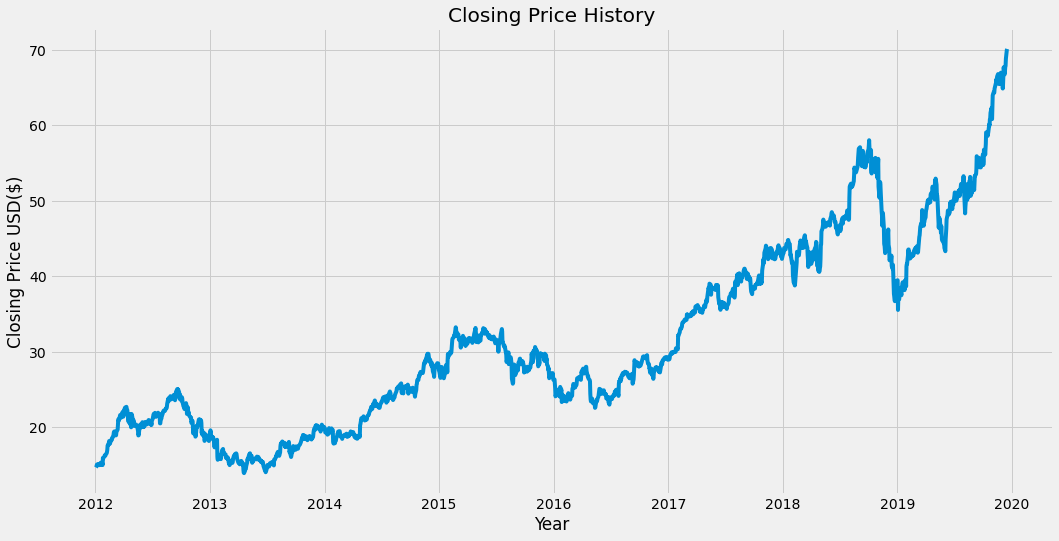

In [6]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel('Closing Price USD($)')
plt.show()

In [11]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

In [28]:
train_data = scaler_data[0:training_data_len]
x_train, y_train = [],[]
for i in range(60,training_data_len):
  x_train.append

array([0.01748985])